In [ ]:
"""
This file analyzes how the evolution of the meander distance from a rather large 
value to a very small value influences the resonance frequency.

In this code, we do not modify either the short feed distance or the width of the meandered track.
"""

"\nCe fichier analyse comment l'evolutin de la distance meandre d'une valeur assez \ngrandre a une valuer tres petite influence la frequence de raisonnance\n\nDans ce code, On ne touche Ni a la distance short feed ni a la largeur de la piste meandree\n"

In [ ]:
from backend.utils.ifa_meander_project_v2.geometry import *
from backend.utils.ifa_meander_project_v2.meshing import *
from backend.utils.ifa_meander_project_v2.frequency import *
from backend.utils.ifa_meander_project_v2.simulation import *

In [ ]:
fC      = 868e6  # central frequency in Hz
delta_f = 4e6    # spacing between samples in Hz
print(f"delta_f = {delta_f/1e6:.2f} MHz")
nPoints = 31     # number of samples

fLow, fHigh, frequencies = calc_frequencies(fC, delta_f, nPoints)
print(f"fLow = {fLow/1e6:.2f} MHz, fHigh = {fHigh/1e6:.2f} MHz, nPoints = {nPoints}")

delta_f = 4.00 MHz
fLow = 808.00 MHz, fHigh = 928.00 MHz, nPoints = 31


In [4]:
mesh_name = "ifa_meander_anlyse.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/ifa_meander_anlyse.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

In [ ]:
a = 15 / 1000  # Width
b = 30 / 1000  # Height

terminal_a = 50 / 1000
terminal_b = 30 / 1000
x_t = np.array([-terminal_a, 0, 0, -terminal_a])
y_t = np.array([terminal_b, terminal_b, 0, 0])

# Fix the short feed and the track width
largeur_piste = 0.5 / 1000        # Minimum possible value
feed          = 15 / 1000         # Value positioned at the middle of the ground plane
feed_point    = np.array([0, feed, 0])      # Feed at the short feed

In [6]:
distance_meandre_list = np.linspace(a - largeur_piste, largeur_piste/2, 200)
print(f"Min distance: {distance_meandre_list[-1]*1000:.2f} mm")
print(f"Max distance: {distance_meandre_list[0]*1000:.2f} mm")

np.save('data/analyse_dist_meandre/distance_meandre_list.npy', distance_meandre_list)

Min distance: 0.25 mm
Max distance: 14.50 mm


"""
The meander distance must always be greater than half the track width 
"""
if distance_meandre < largeur_piste / 2:
    raise ValueError(f"The meander distance ({distance_meandre*1000:.2f} mm) must be greater than half the track width ({largeur_piste*1000/2:.2f} mm)")

if distance_meandre > a - largeur_piste:
    raise ValueError(f"The meander distance ({distance_meandre*1000:.2f} mm) must be less than the plane width minus the track width ({(a-largeur_piste)*1000:.2f} mm)")


In [ ]:
def creation_ifa(largeur, hauteur, width, dist_meandre, feed, x_t, y_t, save_mesh_folder, mesh_name, mesh_size=2.25/1000):
    x, y, N, distance_meandre = ifa_creation(largeur, hauteur, width, dist_meandre)
    x_m, y_m = trace_meander(x, y, width)
    feed_wid = width                    # The width of the track is the same everywhere.
    feed_x = np.array([0, distance_meandre, distance_meandre, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, mesh_size)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)
    return N, distance_meandre

In [ ]:
iteration = 1
New_distance_meandre_list = []
N_list = []
frequences_resonance = []
for distance_meandre in distance_meandre_list:
    try:
        print(f"\nIteration N°{iteration}")
        print(f"Meander distance {distance_meandre * 1000} mm")
        N_list_elem, new_distance_meandre_elem = creation_ifa(a, b, largeur_piste, distance_meandre, feed, x_t, y_t, save_mesh_folder, mesh_name)
        print(f"Number of meanders {N_list_elem}")
        print(f"New meander distance {new_distance_meandre_elem * 1000} mm")

        if len(N_list) == 0 or N_list_elem != N_list[-1]:
            New_distance_meandre_list.append(new_distance_meandre_elem)
            N_list.append(N_list_elem)
            frequence_resonance = analysis(frequencies, ifa_meander_mat, feed_point)
            frequences_resonance.append(frequence_resonance)
            print(f"Resonance frequency: {frequence_resonance/1e6:.2f} MHz")

        iteration += 1
    except ValueError as e:
        print(f"Error: {e}")

np.save(f'data/analyse_dist_meandre/New_distance_meandre_list.npy', New_distance_meandre_list)
np.save(f'data/analyse_dist_meandre/N_list.npy', N_list)
np.save(f'data/frequences_resonance.npy', frequences_resonance)


Iteration N°1
distance meandres 14.499999999999998 mm
Number of meanders 1
New distance meandres 14.499999999999998 mm
Error: too many values to unpack (expected 2)

Iteration N°1
distance meandres 14.428391959798994 mm
Number of meanders 1
New distance meandres 14.499999999999998 mm

Iteration N°2
distance meandres 14.356783919597989 mm
Number of meanders 1
New distance meandres 14.499999999999998 mm

Iteration N°3
distance meandres 14.285175879396984 mm
Number of meanders 1
New distance meandres 14.499999999999998 mm

Iteration N°4
distance meandres 14.213567839195978 mm
Number of meanders 1
New distance meandres 14.499999999999998 mm

Iteration N°5
distance meandres 14.141959798994973 mm
Number of meanders 1
New distance meandres 14.499999999999998 mm

Iteration N°6
distance meandres 14.070351758793969 mm
Number of meanders 1
New distance meandres 14.499999999999998 mm

Iteration N°7
distance meandres 13.998743718592964 mm
Number of meanders 1
New distance meandres 14.4999999999999

In [ ]:
# Load and display N_list.npy
loaded_N_list = np.load('data/analyse_dist_meandre/N_list.npy')
print("Contents of N_list.npy:", loaded_N_list)

# Load and display New_distance_meandre_list.npy
loaded_New_distance_meandre_list = np.load('data/analyse_dist_meandre/New_distance_meandre_list.npy')
print("\nContents of New_distance_meandre_list.npy:", loaded_New_distance_meandre_list * 1000)

# Load and display frequences_resonance.npy
loaded_frequences_resonance = np.load('data/analyse_dist_meandre/frequences_resonance.npy')
print("\nContents of frequences_resonance.npy:", loaded_frequences_resonance * 1e-6)

Contenu de N_list.npy : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 20]

Contenu de New_distance_meandre_list.npy : [14.5         7.          4.5         3.25        2.5         2.
  1.64285714  1.375       1.16666667  1.          0.86363636  0.75
  0.65384615  0.57142857  0.5         0.4375      0.33333333  0.25      ]

Contenu de frequences_resonance.npy : [928. 928. 928. 928. 880. 816. 808. 808. 808. 808. 808. 808. 808. 808.
 808. 808. 808. 808.]


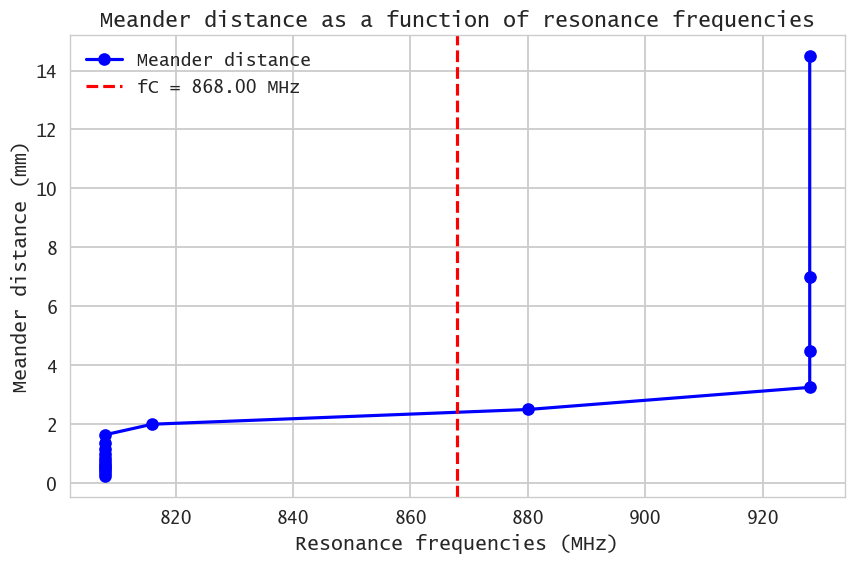

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-talk')
plt.rcParams['font.family'] = 'Lucida Console'
plt.rcParams['font.size'] = 11

# Convert resonance frequencies to MHz
frequences_resonance_mhz = loaded_frequences_resonance * 1e-6
fC_mhz = fC * 1e-6

# Find the index of the central frequency in the resonance frequencies
index_fC = np.where(frequences_resonance_mhz == fC_mhz)[0]
if len(index_fC) > 0:
    distance_meandre_fC = loaded_New_distance_meandre_list[index_fC[0]] * 1000
else:
    distance_meandre_fC = None

# Plot
plt.figure(figsize=(10, 6))
plt.plot(frequences_resonance_mhz, loaded_New_distance_meandre_list * 1000, marker='o', linestyle='-', color='b', label='Meander distance')
plt.axvline(x=fC_mhz, color='r', linestyle='--', label=f'fC = {fC_mhz:.2f} MHz')  # Vertical line for fC

# Add annotation for meander distance at fC_mhz
if distance_meandre_fC is not None:
    plt.scatter([fC_mhz], [distance_meandre_fC], color='g', label=f'Meander distance at fC = {distance_meandre_fC:.2f} mm')

plt.xlabel('Resonance frequencies (MHz)')
plt.ylabel('Meander distance (mm)')
plt.title('Meander distance as a function of resonance frequencies')
plt.legend()
plt.grid(True)
plt.show()

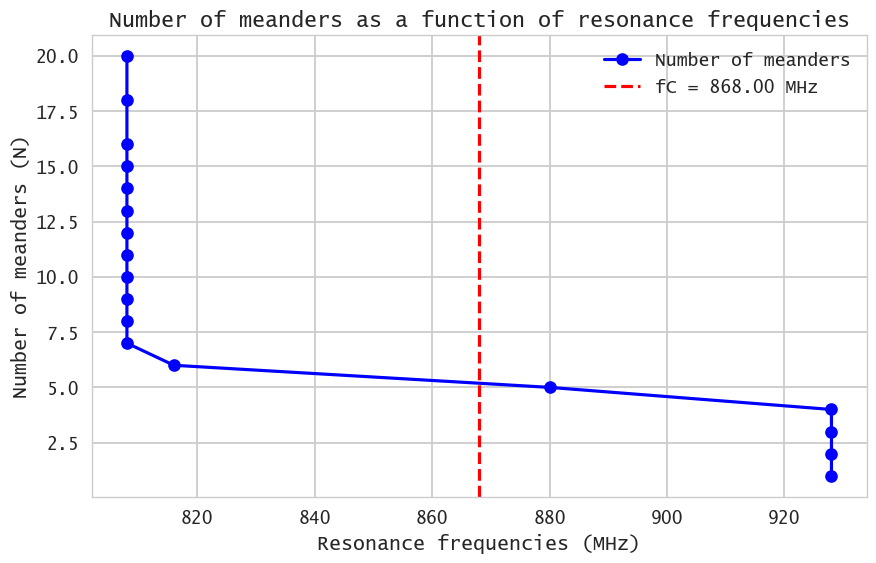

: 

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(frequences_resonance_mhz, loaded_N_list, marker='o', linestyle='-', color='b', label='Number of meanders')
plt.axvline(x=fC_mhz, color='r', linestyle='--', label=f'fC = {fC_mhz:.2f} MHz')

# If we have a value at fC_mhz, display it
if len(index_fC) > 0:
    N_at_fC = loaded_N_list[index_fC[0]]
    plt.scatter([fC_mhz], [N_at_fC], color='g', label=f'N at fC = {N_at_fC}')

plt.xlabel('Resonance frequencies (MHz)')
plt.ylabel('Number of meanders (N)')
plt.title('Number of meanders as a function of resonance frequencies')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
"""
The analysis I am doing at first is that there is no need to modify the meander distance; 
it is enough to just change the number of meanders because it truly determines the spacing between the meanders.

Next, we can hope to set the resonance frequency around 5 as the number of meanders.

Now I will fix the number of meanders at 5 and vary the track width (wid) from a minimum value of 0.5 mm up to 2 * meander_distance for 5 meanders.
"""

"\nL'analyse que je fait dans un premier temps, c'est que pas besoin de modifier la distance meandre, il suffit juste de modifier le nombre de meandre\ncar c'est lui qui fixe veritablement la distance entre les meandres. \n\nEn suite, on peux esperer eteindre la frequence de resonnance autour de 5 comme nombre de meandre.\n\nMaintenant je vais fixer le nombre de meandre a 5 et modifier la taille du wid d'une valuer minimale de 0.5 mm à 2*distance_meandre pour 5 meandres\n"